In [2]:
import numpy as np
import scipy
from scipy.io import loadmat

In [3]:
PATH = '/afs/inf.ed.ac.uk/group/teaching/mlprdata/audio/amp_data.mat'
data = loadmat(PATH)
data = data['amp_data']

In [4]:
print(data.shape)

(33713280, 1)


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1a

## Histogram 

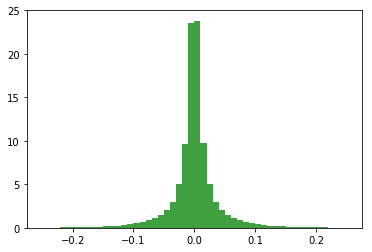

In [6]:
n, bins, patches = plt.hist(data, 50, normed=1, facecolor='g', alpha=0.75, range=[-.25, .25])

## Serie

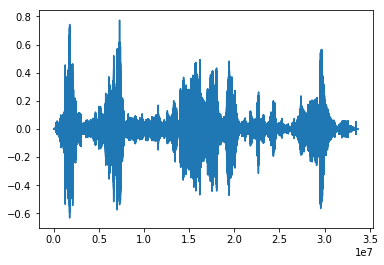

In [7]:
plt.plot(np.arange(data.shape[0]),data)
plt.show()

# Question 1b

In [8]:
import math

def reshaping(data_input,col_dim):
    row_dim = data_input.shape[0] // col_dim
    temp = data[0:(col_dim*row_dim)]
    data_output = np.reshape(temp, (row_dim,col_dim))
    return(data_output)

def shuffling(data_input,seed):
    np.random.seed(seed)
    np.random.shuffle(data_input)
    return(data_input)

def splitting(data_input, percent):
    limit = math.floor(data_input.shape[0]*percent)
    first = data_input[:limit,]
    second = data_input[limit:data_input.shape[0],]
    return first,second

def splitting_targets(data_input,target_col):
    n = data_input.shape[0]
    x = data_input[:n,:(target_col-1)]
    y = data_input[:n,(target_col-1):target_col]
    return x,y

def partitioning(train,valid,test,target_col):
    x_train, y_train = splitting_targets(train,target_col)
    x_valid, y_valid = splitting_targets(valid,target_col)
    x_test, y_test = splitting_targets(test,target_col)
    del train,valid,test
    return x_train,y_train,x_valid,y_valid,x_test,y_test

In [9]:
def make_all(data,seed,percent,target_col):
    data = shuffling(data,seed)
    train,remaining = splitting(data,percent)
    valid, test = splitting(remaining,0.5)
    x_train,y_train,x_valid,y_valid,x_test,y_test = partitioning(train,valid,test,target_col)
    return x_train,y_train,x_valid,y_valid,x_test,y_test

In [10]:
data = reshaping(data,21)

In [11]:
x_train,y_train,x_valid,y_valid,x_test,y_test = make_all(data,seed=1570541,percent=0.7,target_col=21)

# Question 2a

## Generic function to create a linear and a polynomial (quartic) model for some particular observation

In [12]:
def make_models(row):
    x_axis = np.arange(x_train[:1,].shape[1])/20
    x_obs = np.squeeze(x_train[(row-1):row],axis=0)
    y_obs = np.squeeze(y_train[(row-1):row],axis=0)
    # Scatter plot
    plt.figure(figsize=(10,10))
    plt.scatter(x_axis,x_obs)
    plt.show()
    # Linear model
    A = np.vstack([x_axis, np.ones(len(x_obs))]).T
    m, c = np.linalg.lstsq(A,x_obs)[0]
    # Quartic model
    A_poly = np.array([np.power(x_axis,i) for i in np.arange(5)]).T
    solution = np.linalg.lstsq(A_poly,x_obs)[0]
    #Plot the solutions
    plt.figure(figsize=(10,10))
    plt.plot(x_axis, x_obs, 'o', label='Original data', markersize=10)
    plt.plot(x_axis, m*x_axis + c, 'r', label='Linear model')
    plt.plot(x_axis, np.dot(A_poly,solution), 'g', label='Quartic model')
    plt.plot(1, y_obs, 'b*', label='Real value')
    plt.plot(1, m*1+c, 'r*', label='Linear prediction')
    plt.plot(1, np.dot(np.ones((solution.shape[0],1)).T,solution), 'g*', label='Quartic prediction')
    plt.legend()
    plt.show()

## Applying our function for some rows

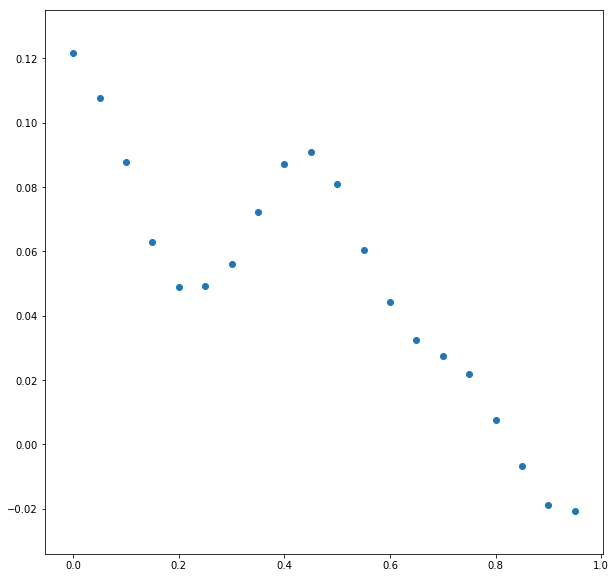

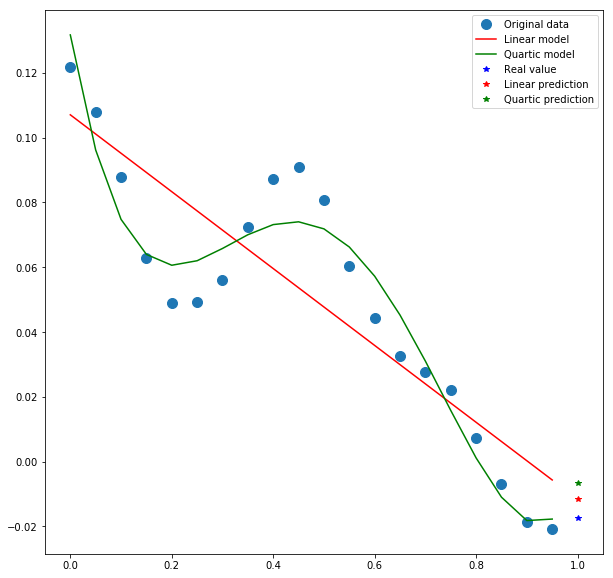

In [13]:
make_models(1)

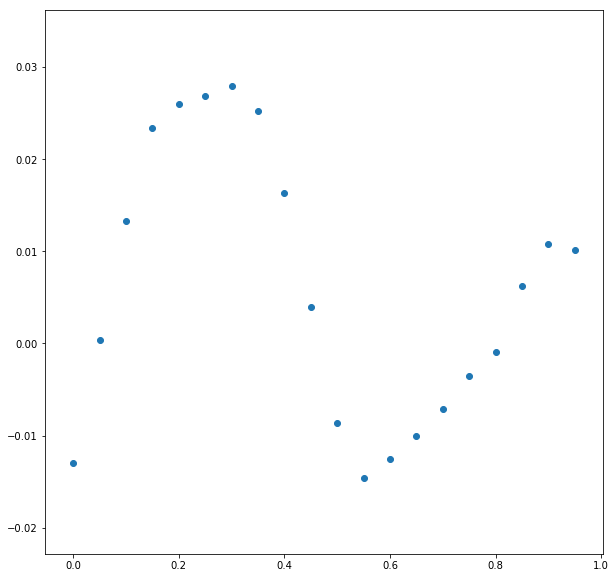

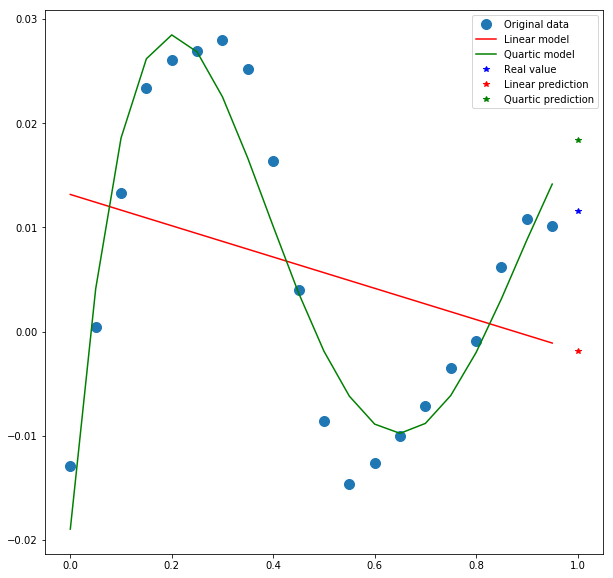

In [14]:
make_models(2)

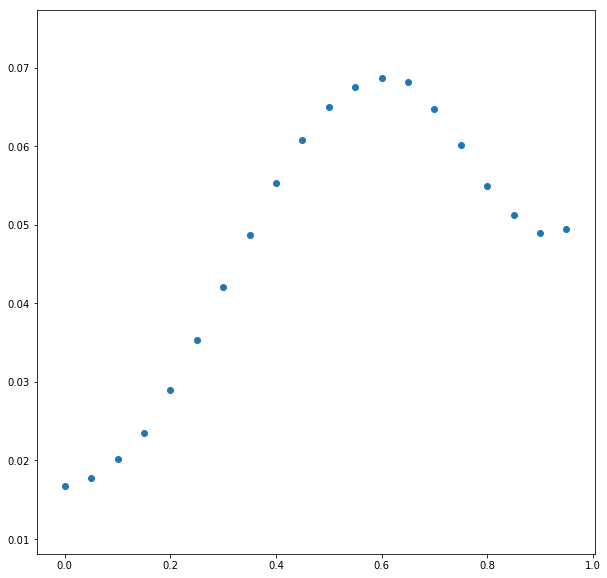

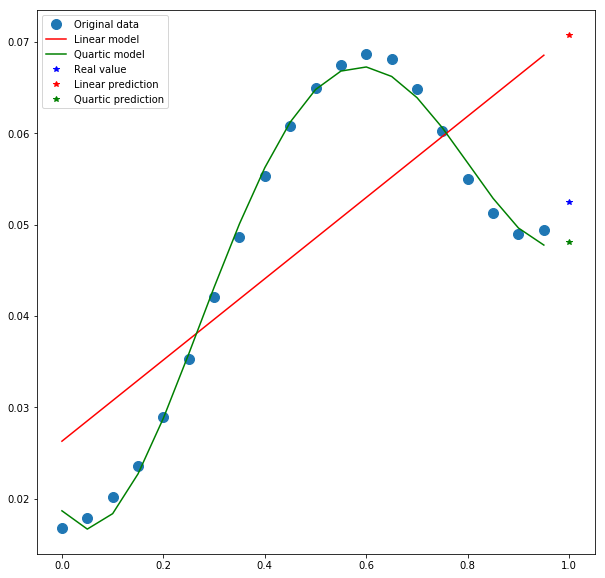

In [15]:
make_models(4)

# Question 2b

### (To be answered)

# Question 2c

### (To be answered)